# Table of contents
### Import libraries and data
### Data wrangling
### Create map using folium

## Import libraries and data

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [69]:
%matplotlib inline

In [70]:
path = r'C:\Users\Andrew\Desktop\Data project'

In [71]:
citi22 = pd.read_pickle(os.path.join(path, '02 data', 'clean', 'citi22.pkl'))

In [72]:
citi22.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_latitude,start_longitude,end_latitude,end_longitude,member_type,start hour,start day,weekday,month,TripMins,trip_mins,start_station_frequency,end_station_frequency
0,electric_bike,2022-01-26 18:50:39,2022-01-26 18:51:53,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,1,18,26,2,1,0 days 00:01:14,1.23,17060,17518
1,classic_bike,2022-01-28 13:14:07,2022-01-28 13:20:23,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,1,13,28,4,1,0 days 00:06:16,6.27,5834,5989
2,classic_bike,2022-01-10 19:55:13,2022-01-10 20:00:37,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,1,19,10,0,1,0 days 00:05:24,5.40,5834,5989
3,electric_bike,2022-01-26 07:54:57,2022-01-26 07:55:22,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,1,7,26,2,1,0 days 00:00:25,0.42,17060,17518
4,electric_bike,2022-01-13 18:44:46,2022-01-13 18:45:43,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,1,18,13,3,1,0 days 00:00:57,0.95,17060,17518


In [73]:
country_geo = r"C:\Users\Andrew\Desktop\Data project\02 Data\Original\us-states.json"

<Axes: xlabel='start_station_name', ylabel='Count'>

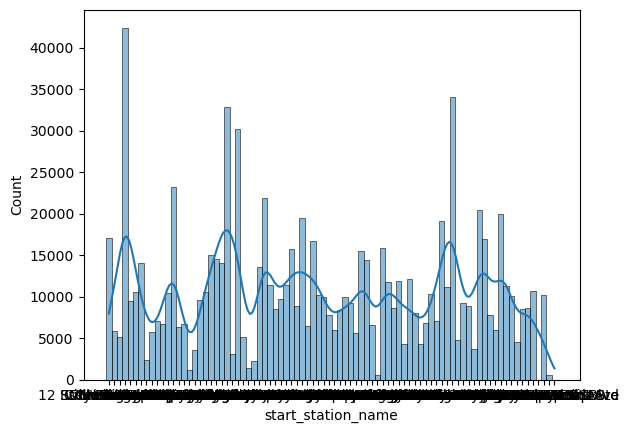

In [74]:
sns.histplot(citi22['start_station_name'], bins=20, kde = True)

## Data wrangling

### Create a list to make a new dataframe of start stations with counts / usage

In [75]:
start_lst = citi22['start_station_name'].value_counts()

In [76]:
bike_freq = pd.DataFrame(start_lst)

In [77]:
bike_freq

,start_station_name
Grove St PATH,42455
South Waterfront Walkway - Sinatra Dr & 1 St,34130
Hoboken Terminal - River St & Hudson Pl,32899
Hoboken Terminal - Hudson St & Hudson Pl,30165
City Hall - Washington St & 1 St,23214
...,...
Bergen Ave & Stegman St,1108
Grant Ave & MLK Dr,574
York St & Marin Blvd,553
JCBS Depot,2


### Rename columns

In [78]:
bike_freq.rename(columns = {'start_station_name':'start_use_freq'}, inplace = True)

In [79]:
bike_freq

,start_use_freq
Grove St PATH,42455
South Waterfront Walkway - Sinatra Dr & 1 St,34130
Hoboken Terminal - River St & Hudson Pl,32899
Hoboken Terminal - Hudson St & Hudson Pl,30165
City Hall - Washington St & 1 St,23214
...,...
Bergen Ave & Stegman St,1108
Grant Ave & MLK Dr,574
York St & Marin Blvd,553
JCBS Depot,2


### because the index is curently set with station names. The next step is to create a new column as start_station_name and reset the 0 column to a numeric index
### first step is to copy the index as station name

In [80]:
bike_freq['start_station_name'] = bike_freq.index

In [81]:
bike_freq

,start_use_freq,start_station_name
Grove St PATH,42455,Grove St PATH
South Waterfront Walkway - Sinatra Dr & 1 St,34130,South Waterfront Walkway - Sinatra Dr & 1 St
Hoboken Terminal - River St & Hudson Pl,32899,Hoboken Terminal - River St & Hudson Pl
Hoboken Terminal - Hudson St & Hudson Pl,30165,Hoboken Terminal - Hudson St & Hudson Pl
City Hall - Washington St & 1 St,23214,City Hall - Washington St & 1 St
...,...,...
Bergen Ave & Stegman St,1108,Bergen Ave & Stegman St
Grant Ave & MLK Dr,574,Grant Ave & MLK Dr
York St & Marin Blvd,553,York St & Marin Blvd
JCBS Depot,2,JCBS Depot


### Reset index

In [82]:
bike_freq = bike_freq.reset_index(drop=True)

bike_freq = bike_freq[['start_station_name', 'start_use_freq']]

In [83]:
bike_freq

,start_station_name,start_use_freq
0,Grove St PATH,42455
1,South Waterfront Walkway - Sinatra Dr & 1 St,34130
2,Hoboken Terminal - River St & Hudson Pl,32899
3,Hoboken Terminal - Hudson St & Hudson Pl,30165
4,City Hall - Washington St & 1 St,23214
...,...,...
79,Bergen Ave & Stegman St,1108
80,Grant Ave & MLK Dr,574
81,York St & Marin Blvd,553
82,JCBS Depot,2


In [131]:
bike_freq.head(10).sort_values(by = 'start_use_freq', ascending = False)

,start_station_name,start_use_freq
0,Grove St PATH,42455
1,South Waterfront Walkway - Sinatra Dr & 1 St,34130
2,Hoboken Terminal - River St & Hudson Pl,32899
3,Hoboken Terminal - Hudson St & Hudson Pl,30165
4,City Hall - Washington St & 1 St,23214
5,Newport Pkwy,21907
6,Hamilton Park,20431
7,Newport PATH,19917
8,Hoboken Ave at Monmouth St,19446
9,Marin Light Rail,19167


In [132]:
bike_freq.tail(10).sort_values(by = 'start_use_freq', ascending = False)

,start_station_name,start_use_freq
74,Communipaw & Berry Lane,3541
75,5 Corners Library,3028
76,Union St,2379
77,Dey St,2252
78,Jackson Square,1456
79,Bergen Ave & Stegman St,1108
80,Grant Ave & MLK Dr,574
81,York St & Marin Blvd,553
82,JCBS Depot,2
83,MTL-ECO5-LAB,2


### Select information needed for mapping

In [84]:
start_station_map = citi22.iloc[: , [3, 7, 8]].copy()

In [85]:
start_station_map

,start_station_name,start_latitude,start_longitude
0,12 St & Sinatra Dr N,40.750604,-74.024020
1,Essex Light Rail,40.712774,-74.036486
2,Essex Light Rail,40.712774,-74.036486
3,12 St & Sinatra Dr N,40.750604,-74.024020
4,12 St & Sinatra Dr N,40.750604,-74.024020
...,...,...,...
48580,Dey St,40.737828,-74.067083
48581,9 St HBLR - Jackson St & 8 St,40.747907,-74.038412
48582,Mama Johnson Field - 4 St & Jackson St,40.743140,-74.040041
48583,Mama Johnson Field - 4 St & Jackson St,40.743135,-74.040080


### Note that we only need the unique value of each station as we are mapping the value count onto the above dataframe, we will drop the duplicate of this dataframe
### Duplicates is probably from the same station name but with slightly different start_lat / start_lng

In [86]:
start_station_map = start_station_map.drop_duplicates('start_station_name')

In [87]:
start_station_map

,start_station_name,start_latitude,start_longitude
0,12 St & Sinatra Dr N,40.750604,-74.024020
1,Essex Light Rail,40.712774,-74.036486
44,Christ Hospital,40.734786,-74.050444
120,Grove St PATH,40.719586,-74.043117
137,Willow Ave & 12 St,40.751867,-74.030377
...,...,...,...
23725,Van Vorst Park,40.718489,-74.047727
2559,JCBS Depot,40.709651,-74.068601
46274,Bergen Ave & Sip Ave,40.731009,-74.064437
17084,York St & Marin Blvd,40.716615,-74.042412


### the number of rows for start_station map and bike_freq matches. We are going to merge the 2 dataframe together

In [88]:
# 1) we convert the bike_freq into a dictionary

bike_freq_dict = dict(bike_freq.values)

# 2) we map this dictionary as a new column in start_station_map

start_station_map['start_use_freq'] = start_station_map['start_station_name'].map(bike_freq_dict)

#quick look at the new start_station_map

start_station_map

C:\Users\Andrew\AppData\Local\Temp\ipykernel_5148\3977207040.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  start_station_map['start_use_freq'] = start_station_map['start_station_name'].map(bike_freq_dict)


,start_station_name,start_latitude,start_longitude,start_use_freq
0,12 St & Sinatra Dr N,40.750604,-74.024020,17060
1,Essex Light Rail,40.712774,-74.036486,5834
44,Christ Hospital,40.734786,-74.050444,5190
120,Grove St PATH,40.719586,-74.043117,42455
137,Willow Ave & 12 St,40.751867,-74.030377,9439
...,...,...,...,...
23725,Van Vorst Park,40.718489,-74.047727,10719
2559,JCBS Depot,40.709651,-74.068601,2
46274,Bergen Ave & Sip Ave,40.731009,-74.064437,10204
17084,York St & Marin Blvd,40.716615,-74.042412,553


In [89]:
### Create categories for usage classified as 'V high', 'High', 'Moderate', 'Mild', and 'Low'

In [104]:
conditions = [
    (start_station_map['start_use_freq'] >= 12000),
    (start_station_map['start_use_freq'] >= 9000) & (start_station_map['start_use_freq'] < 12000),
    (start_station_map['start_use_freq'] >= 6000) & (start_station_map['start_use_freq'] < 9000),
    (start_station_map['start_use_freq'] < 6000)
]

values = [ 'High', 'Moderate', 'Mild', 'Low']

start_station_map['usage_cat'] = np.select(conditions, values)

C:\Users\Andrew\AppData\Local\Temp\ipykernel_5148\2806804446.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  start_station_map['usage_cat'] = np.select(conditions, values)


In [105]:
start_station_map

,start_station_name,start_latitude,start_longitude,start_use_freq,usage_cat,color
0,12 St & Sinatra Dr N,40.750604,-74.024020,17060,High,red
1,Essex Light Rail,40.712774,-74.036486,5834,Low,lightgray
44,Christ Hospital,40.734786,-74.050444,5190,Low,lightgray
120,Grove St PATH,40.719586,-74.043117,42455,High,red
137,Willow Ave & 12 St,40.751867,-74.030377,9439,Moderate,orange
...,...,...,...,...,...,...
23725,Van Vorst Park,40.718489,-74.047727,10719,Moderate,orange
2559,JCBS Depot,40.709651,-74.068601,2,Low,lightgray
46274,Bergen Ave & Sip Ave,40.731009,-74.064437,10204,Moderate,orange
17084,York St & Marin Blvd,40.716615,-74.042412,553,Low,lightgray


## Create Map using Folium

In [106]:
start_use_map=folium.Map(
        location=[40.718502, -73.983299],
        zoom_start=12, 
        width = 900, height = 600, 
        control_scale=True)

for _, start_station in start_station_map.iterrows():
    folium.Marker(
        location=[start_station['start_latitude'], start_station['start_longitude']],
        popup=start_station['start_use_freq'],
        tooltip=start_station['start_station_name']
    ).add_to(start_use_map)

start_use_map

### create a function to map the markers to  a specific color

In [118]:
def select_marker_color(row):

    elif row['usage_cat'] == 'High':
        return 'red'
    elif row['usage_cat'] == 'Moderate':
        return 'orange'
    elif row['usage_cat'] == 'Mild':
        return 'beige'
    elif row['usage_cat'] == 'Low':
        return 'lightgray'

SyntaxError: invalid syntax (1902364862.py, line 3)

In [119]:
start_station_map['color'] = start_station_map.apply(select_marker_color, axis=1)
start_station_map

C:\Users\Andrew\AppData\Local\Temp\ipykernel_5148\3598003138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  start_station_map['color'] = start_station_map.apply(select_marker_color, axis=1)


,start_station_name,start_latitude,start_longitude,start_use_freq,usage_cat,color
0,12 St & Sinatra Dr N,40.750604,-74.024020,17060,High,red
1,Essex Light Rail,40.712774,-74.036486,5834,Low,lightgray
44,Christ Hospital,40.734786,-74.050444,5190,Low,lightgray
120,Grove St PATH,40.719586,-74.043117,42455,High,red
137,Willow Ave & 12 St,40.751867,-74.030377,9439,Moderate,orange
...,...,...,...,...,...,...
23725,Van Vorst Park,40.718489,-74.047727,10719,Moderate,orange
2559,JCBS Depot,40.709651,-74.068601,2,Low,lightgray
46274,Bergen Ave & Sip Ave,40.731009,-74.064437,10204,Moderate,orange
17084,York St & Marin Blvd,40.716615,-74.042412,553,Low,lightgray


### Add a new color line in Folium Map

In [120]:
start_use_map=folium.Map(
        location=[40.718502, -73.983299],
        zoom_start=12, 
        width = 900, height = 1200, 
        control_scale=True)

for _, start_station in start_station_map.iterrows():
    folium.Marker(
        location=[start_station['start_latitude'], start_station['start_longitude']],
        popup=start_station['start_use_freq'],
        tooltip=start_station['start_station_name'],
        icon=folium.Icon(color=start_station['color'])
    ).add_to(start_use_map)

start_use_map

In [117]:
start_station_map['start_use_freq'].describe()

count       84.000000
mean     10622.392857
std       7565.746968
min          2.000000
25%       6011.750000
50%       9340.000000
75%      13662.750000
max      42455.000000
Name: start_use_freq, dtype: float64

### From this map we can gather that a lot of rentals are started along the hudson river which could be the result of any number of external sources.
### The only question this would lead me to is are those high traffic areas responsible for a lot of the summer renals since they are by the water?

In [97]:
start_use_map.save(os.path.join(path, '04 Analysis', 'use_map.png'))